# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

## imports for Python, Pandas, json and matplotlib

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [11]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

# Answers

## Top 10 countries with most projects 

Text(0, 0.5, 'Number of Projects')

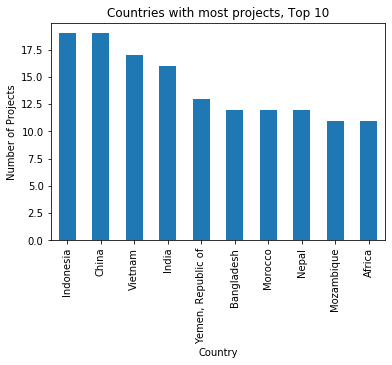

In [136]:
#import world_bank_projects json and store in 'df'
df = pd.read_json('data/world_bank_projects.json')

#count the number of times each country appears in the project dataframe and return the top 10 counts
top_countries = df.countryshortname.value_counts().head(10)

#make a bar plot showing the top 10 major projects
top_countries_plot = top_countries.plot(kind='bar', title='Countries with most projects, Top 10')
#set x axis label of plot
top_countries_plot.set_xlabel('Country')
#set y axis label of plot
top_countries_plot.set_ylabel('Number of Projects')

## Top 10 Major Project Themes

Text(0, 0.5, 'Number of Occurences')

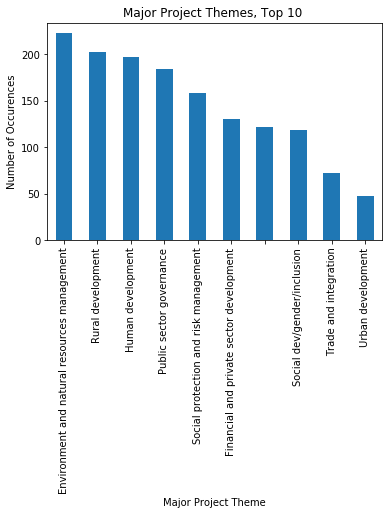

In [135]:
#load json to string called themes
themes = json.load((open('data/world_bank_projects.json')))

#normalize the json string to a dataframe, only retain the major theme codes and the country short names
proj = json_normalize(themes, 'mjtheme_namecode', ['countryshortname'])
#return the counts of the top 10 major project themes
top_10 = proj.name.value_counts().head(10)

#make a bar plot showing the top 10 major projects
top_10_plot = top_10.plot(kind='bar', title='Major Project Themes, Top 10 ')
#set x axis label of plot
top_10_plot.set_xlabel('Major Project Theme')
#set y axis label of plot
top_10_plot.set_ylabel('Number of Occurences')


### Notice that the 4th bar from the right is blank. This is because some of the names of the major project themes were left blank in the original dataset. Let's fill these and plot the results again.

Text(0, 0.5, 'Number of Occurences')

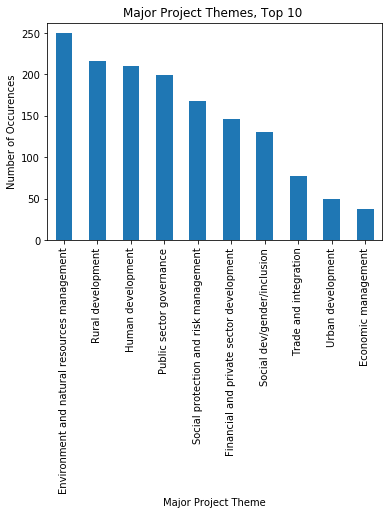

In [137]:
#sort dataframe so that codes are grouped together and empty values are on top
proj.sort_values(by=['code', 'name'], inplace=True)
#replace empty strings in name column with back fill method
proj.name.replace('', method='bfill', inplace=True)
#sort by index to return dataframe to initial order
proj.sort_index(inplace=True)
#return the counts of the top 10 major project themes
top_10 = proj.name.value_counts().head(10)

#make a bar plot showing the top 10 major projects
top_10_plot = top_10.plot(kind='bar', title='Major Project Themes, Top 10 ')
#set x axis label of plot
top_10_plot.set_xlabel('Major Project Theme')
#set y axis label of plot
top_10_plot.set_ylabel('Number of Occurences')